In [13]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import ball
from skimage.segmentation import watershed
from skimage.filters import rank
from scipy import ndimage as ndi
from copy import copy
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

In [3]:
image = sk.io.imread('./../ppujol/super_collapsed/Cam_Short_00003.lux-1.tif')

(1086, 2048, 1484)

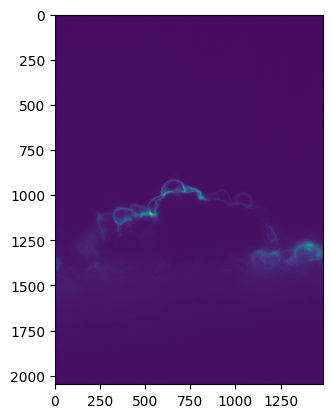

In [5]:
plt.imshow(image[640])
image.shape

In [11]:
z, y, x = 640, 960, 650
delta = 150
division = 1
cell = image[z-int(delta/division):z+int(delta/division), y-delta:y+delta, x-delta:x+delta]
cell.shape

(300, 300, 300)

In [9]:
def normalize_image(im, mult_factor = 1):
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im
def reverse_values(im):
    rev_im = im.max()-im
    return rev_im

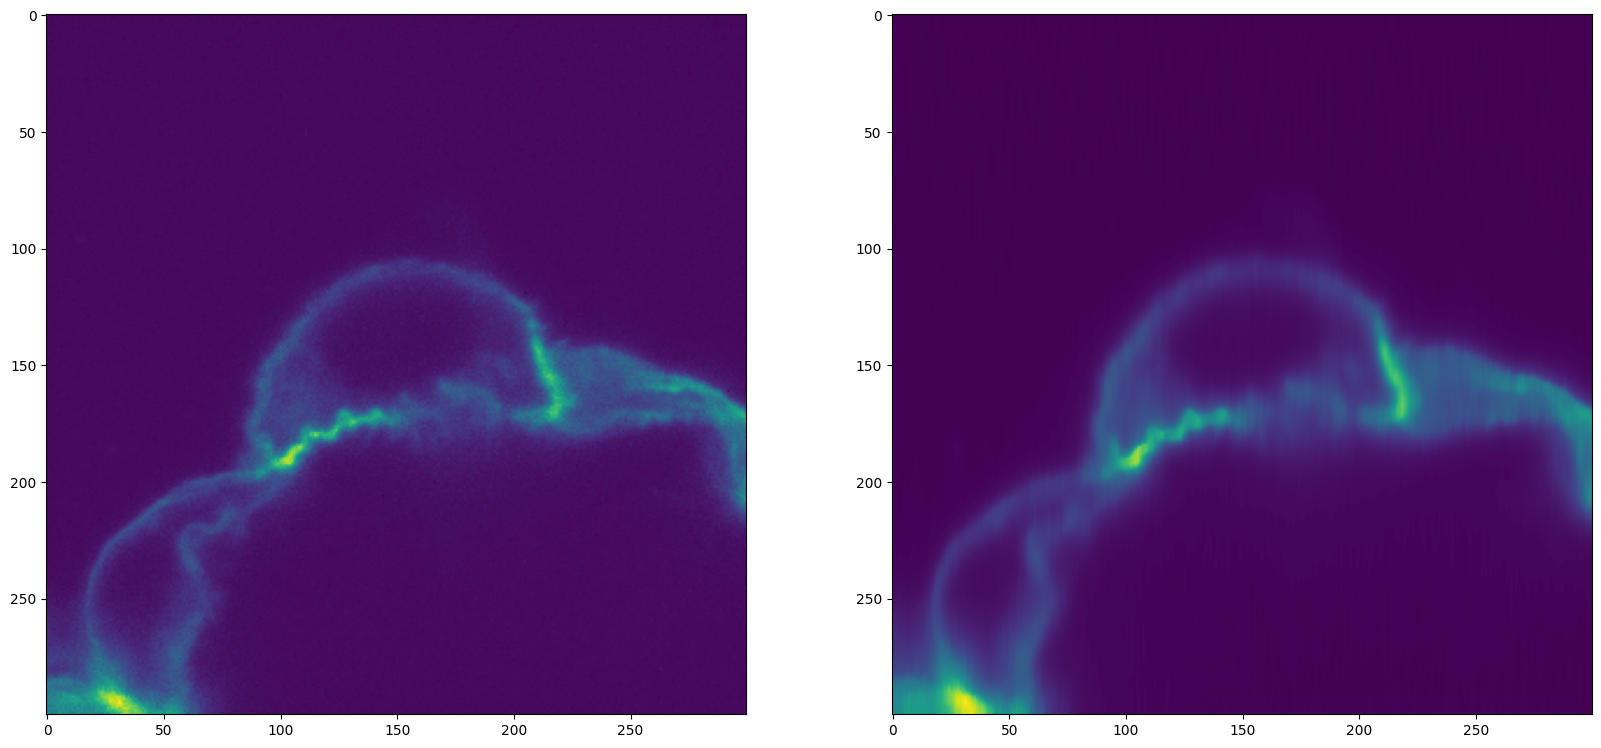

In [17]:
cell = normalize_image(cell, 65535).astype(np.uint16)
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(cell[int(delta/division)])
plt.subplot(222)
cell_1 = denoise_tv_chambolle(cell, weight=0.2, channel_axis=-1)
plt.imshow(cell_1[int(delta/division)])